# Missing Data Analysis of CrossFit Open 2019 Dataset

The full Open 2019 dataset with it's 72 features and over 338k observations contains a lot missing data. Since most machine learning algorithms can not handle missing data this notebook analyses the amount and structure of missing values. It concludes with recommended actions for the data preparation.

In [41]:
# import relevant libraries
import pandas as pd
import numpy as np
import missingno as msno
import warnings

# set options
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
# read clean Open 2019 dataset and drop unnamed column
df = pd.read_csv('./data/19_clean.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Data Overview

In [55]:
df.shape

(338538, 72)

In [7]:
df.head()

,competitorid,firstname,lastname,gender,countryoforiginname,affiliatename,age,height,weight,overallrank,overallscore,is_scaled,division,rank_1,rank_2,rank_3,rank_4,rank_5,time_2,time_3,time_4,time_5,scaled_1,scaled_2,scaled_3,scaled_4,scaled_5,score_1,score_2,score_3,score_4,score_5,bs_backsquat,bs_cleanandjerk,bs_snatch,bs_deadlift,bs_fightgonebad,bs_maxpull_ups,bs_fran,bs_grace,bs_helen,bs_filthy50,bs_sprint400m,bs_run5k,w1_reps_total,w2_reps_total,w2_reps_t2b,w2_reps_du,w2_reps_sqcl,w2_rounds_completed,w2_tiebreak,w3_reps_total,w3_5ft_reps_ohl,w3_reps_dbbsu,w3_reps_hspu,w3_hspu_status,w3_5ft_reps_hsw,w3_rounds_completed,w3_tiebreak,w4_reps_total,w4_reps_sn,w4_reps_bp,w4_reps_bmu,w4_bmu_status,w4_tiebreak,w5_reps_total,w5_reps_thr,w5_reps_c2bpu,region,w2_full_rounds_completed,w3_full_rounds_completed,BMI
0,86,Justin,Bergh,M,United States,CrossFit HQ,37.0,1.96,102.06,53022,304948,0,Men,15232,58534,59298,85576,86308,480.0,600.0,720.0,1200.0,0,0,0,0,0,13040000,11670764,10980237,10720255,11350000,151.0,120.0,95.0,188.0,393.0,32.0,226.0,174.0,496.0,1287.0,64.0,1325.0,304.0,167.0,50.0,100.0,17.0,1.88,436.0,98.0,40.0,50.0,8.0,1.0,0.0,2.16,363.0,72.0,30.0,36.0,6.0,1.0,465.0,135.0,75.0,60.0,USA,< 8 min,HSPU,26.6
1,88,Cary,Hair,M,United States,CrossFit Santa Cruz,34.0,1.83,86.64,4361,37192,0,Men,5891,5456,7199,13060,5586,720.0,600.0,720.0,882.0,0,0,0,0,0,13240000,12620599,11330328,11170505,12100318,206.0,142.0,120.0,234.0,407.0,54.0,140.0,109.0,448.0,1103.0,54.0,1294.0,324.0,262.0,75.0,150.0,37.0,2.98,601.0,133.0,40.0,50.0,43.0,1.0,0.0,2.86,NaN,117.0,30.0,60.0,27.0,1.0,215.0,210.0,105.0,105.0,USA,< 12 min,HSPU,25.9
2,92,Tim,Chan,M,United States,CrossFit SoCal,49.0,1.68,73.03,117405,564929,0,Men,155079,102548,127946,76177,103179,480.0,600.0,720.0,1200.0,0,0,0,0,0,11710000,11021027,10510000,10770250,11090000,102.0,92.0,70.0,138.0,NaN,35.0,262.0,281.0,645.0,1661.0,NaN,NaN,171.0,102.0,37.0,50.0,15.0,1.14,173.0,51.0,40.0,11.0,0.0,0.0,0.0,1.22,600.0,77.0,30.0,37.0,10.0,1.0,470.0,109.0,60.0,49.0,USA,< 8 min,Box SU,25.9
3,93,Leif,Edmundson,M,United States,CrossFit HQ,37.0,1.83,92.99,38765,237798,0,Men,50223,39468,78855,40425,28827,480.0,600.0,720.0,1200.0,0,0,0,0,0,12670000,11720803,10920171,10970472,12010000,138.0,106.0,83.0,161.0,403.0,45.0,220.0,154.0,493.0,1500.0,62.0,1239.0,267.0,172.0,50.0,100.0,22.0,1.93,397.0,92.0,40.0,50.0,2.0,1.0,0.0,2.04,429.0,97.0,30.0,48.0,19.0,1.0,248.0,201.0,105.0,96.0,USA,< 8 min,HSPU,27.8
4,1617,John,Mclaughlin,M,United States,CrossFit Palm Beach,51.0,1.78,84.82,12050,89855,0,Men,12686,26138,26923,13629,10479,480.0,600.0,720.0,999.0,0,0,0,0,0,13080000,11760858,11130242,11170482,12100201,161.0,115.0,88.0,197.0,NaN,50.0,146.0,154.0,444.0,NaN,NaN,NaN,308.0,176.0,50.0,100.0,26.0,1.98,342.0,113.0,40.0,50.0,23.0,1.0,0.0,2.46,358.0,117.0,30.0,60.0,27.0,1.0,238.0,210.0,105.0,105.0,USA,< 8 min,HSPU,26.8


# Missing Value Analysis

In [12]:
df.isna().sum()

competitorid                     0
firstname                        0
lastname                         0
gender                           0
countryoforiginname              0
affiliatename                    0
age                              4
height                      157539
weight                      146363
overallrank                      0
overallscore                     0
is_scaled                        0
division                         0
rank_1                           0
rank_2                           0
rank_3                           0
rank_4                           0
rank_5                           0
time_2                       35923
time_3                       46287
time_4                       58262
time_5                       84115
scaled_1                         0
scaled_2                         0
scaled_3                         0
scaled_4                         0
scaled_5                         0
score_1                          0
score_2             

Missing values are present in:
1. Workout Results:
* 19.1 - 13,219 (4%)
* 19.2 - 35,850 (11%) (time 35,923 (11%); tiebreak 43,582 (13%))
* 19.3 - 46,284 (14%) (time 46,287 (14%); tiebreak 49,047 (15%))
* 19.4 - 58,225 (17%) (time 58,262 (17%); tiebreak 75,553 (22%))
* 19.5 - 84,115 (25%)
2. Body Measurements:
* age - 4 (0%)
* height - 157,539 (47%)
* weight - 146,363 (43%)
3. Benchmark Statistics:
* bs_backsquat - 246,431 (73%)
* bs_cleanandjerk - 253,771 (75%)
* bs_snatch - 256,922 (76%)
* bs_deadlift - 243,992 (72%)
* bs_fightgonebad - 318,136 (94%)
* bs_maxpull_ups - 304,877 (90%)
* bs_fran - 295,350 (87%)
* bs_grace - 303,716 (90%)
* bs_helen - 313,636 (93%)
* bs_filthy50 - 325,487 (96%)
* bs_sprint400m - 322,311 (95%)
* bs_run5k - 307,394 (91%)


### Workout Results

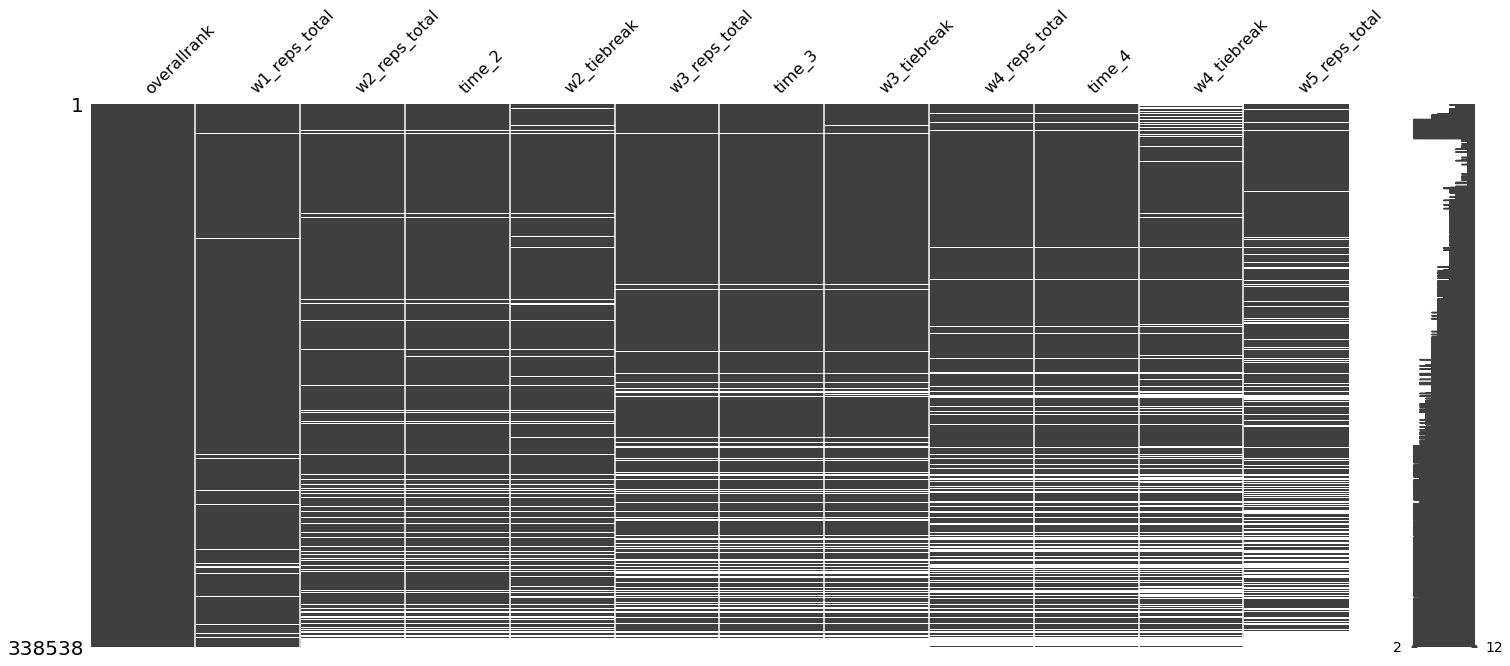

In [88]:
cols_19 = ['overallrank','w1_reps_total', \
           'w2_reps_total','time_2','w2_tiebreak', \
           'w3_reps_total','time_3','w3_tiebreak', \
           'w4_reps_total','time_4','w4_tiebreak', \
           'w5_reps_total']
msno.matrix(df[cols_19].sort_values(by='overallrank'));

In [84]:
cols_part = ['overallrank','w1_reps_total','w2_reps_total','w3_reps_total', \
           'w4_reps_total','w5_reps_total']
df[cols_part].dropna()['overallrank'].count()

219494

A missing of workout results means that athletes did not participate. Just 65% competitors participated in all five workouts and would be left when dropping observations. The missing of workout results (wi_reps_total) has an influence on the performance in other workouts, including especially the overall ranking position. The better the overall rank the less missing values Thus, there is MNAR (Missing Not At Random) of missing participation.
Recommended action:
1. Since most athletes do not finish workouts within timecap, time features can be dropped.
2. missing participation:
* complete case analysis (drop missing observations)
* multiple imputation of missing workout values

### Body Measurements

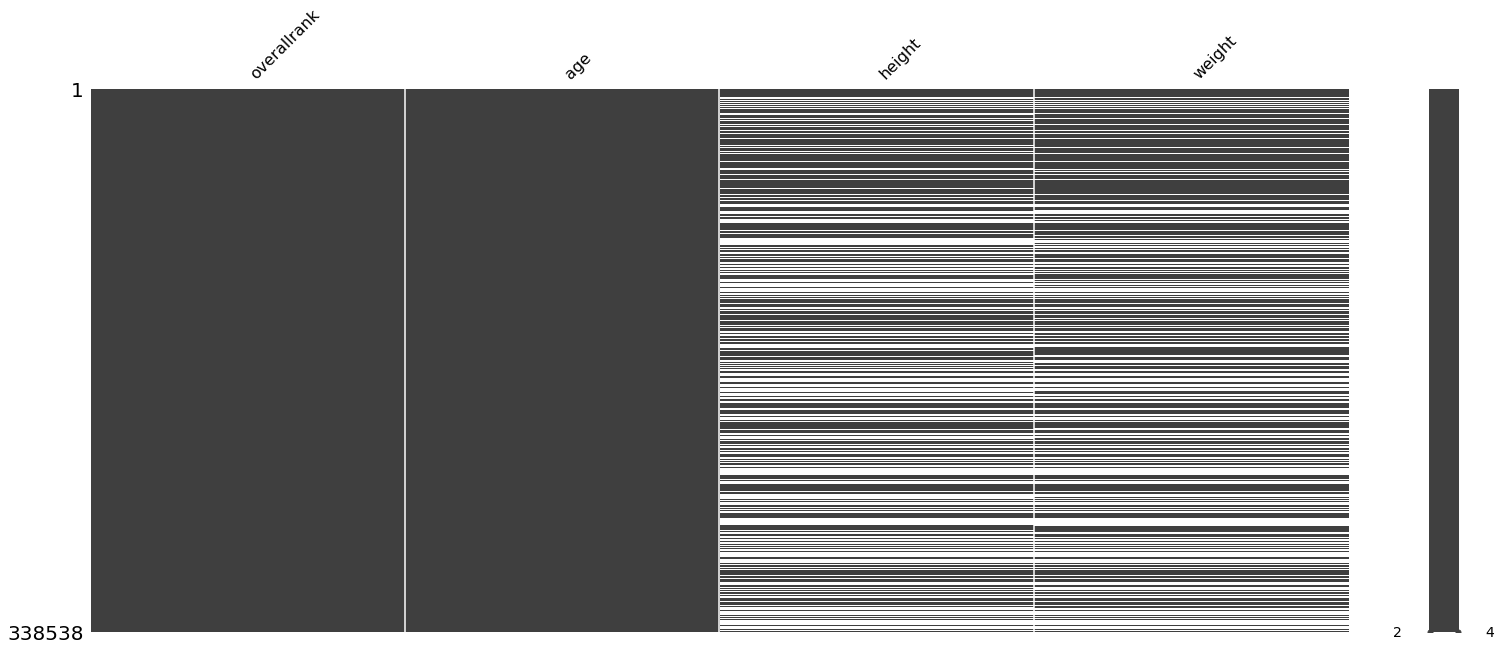

In [83]:
cols_hw = ['overallrank','age','height','weight']
msno.matrix(df[cols_hw].sort_values(by='overallrank'));

There are just 4 missing age values, these observation can be dropped. Very top athletes do reveal their height and weight data. Most missing values are randomly distributed, the is MAR (Missing At Random). Thus, the imputation of missing height and weight values is recommended, as well as dropping heights and weights.

### Benchmark Statistics

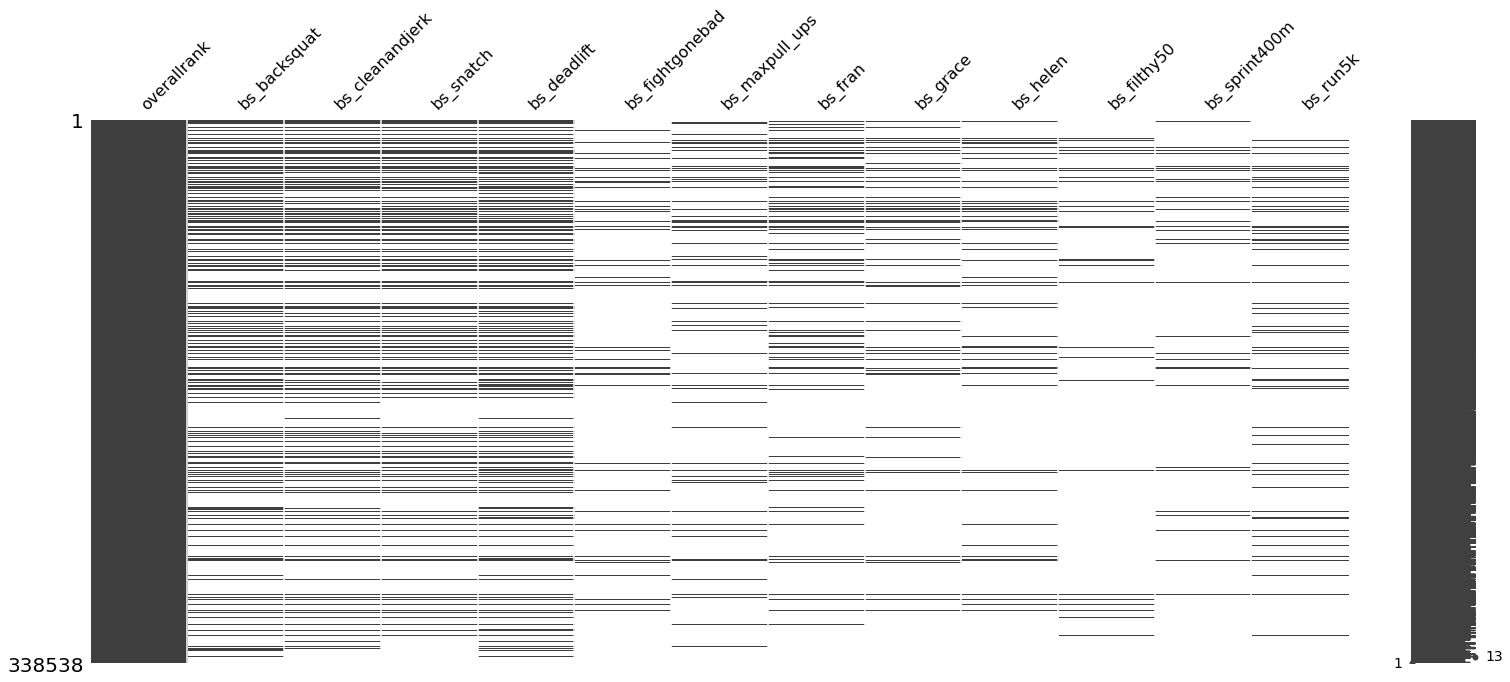

In [48]:
cols_bs = ['overallrank','bs_backsquat','bs_cleanandjerk','bs_snatch','bs_deadlift', \
           'bs_fightgonebad','bs_maxpull_ups','bs_fran','bs_grace', \
           'bs_helen','bs_filthy50','bs_sprint400m','bs_run5k']
msno.matrix(df[cols_bs].sort_values(by='overallrank'));

In [94]:
df_bs = df[(df['bs_backsquat'].notna()) |
   (df['bs_cleanandjerk'].notna()) |
   (df['bs_snatch'].notna()) |
   (df['bs_deadlift'].notna()) |
   (df['bs_fightgonebad'].notna()) |
   (df['bs_maxpull_ups'].notna()) |
   (df['bs_fran'].notna()) |
   (df['bs_grace'].notna()) |
   (df['bs_helen'].notna()) |
   (df['bs_filthy50'].notna()) |
   (df['bs_sprint400m'].notna()) |
   (df['bs_run5k'].notna())
  ]

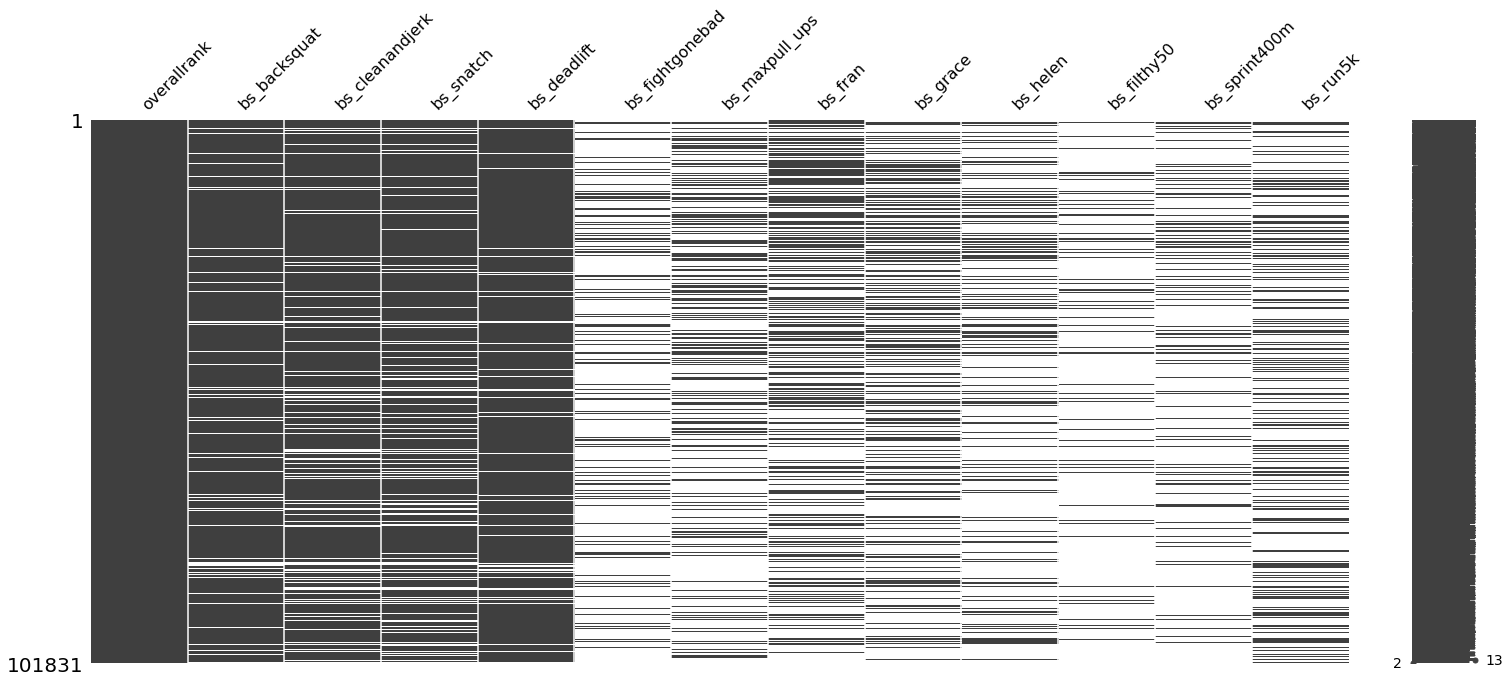

In [95]:
msno.matrix(df_bs[cols_bs].sort_values(by='overallrank'));

In [96]:
df_lift = df[(df['bs_backsquat'].notna()) |
   (df['bs_cleanandjerk'].notna()) |
   (df['bs_snatch'].notna()) |
   (df['bs_deadlift'].notna())]

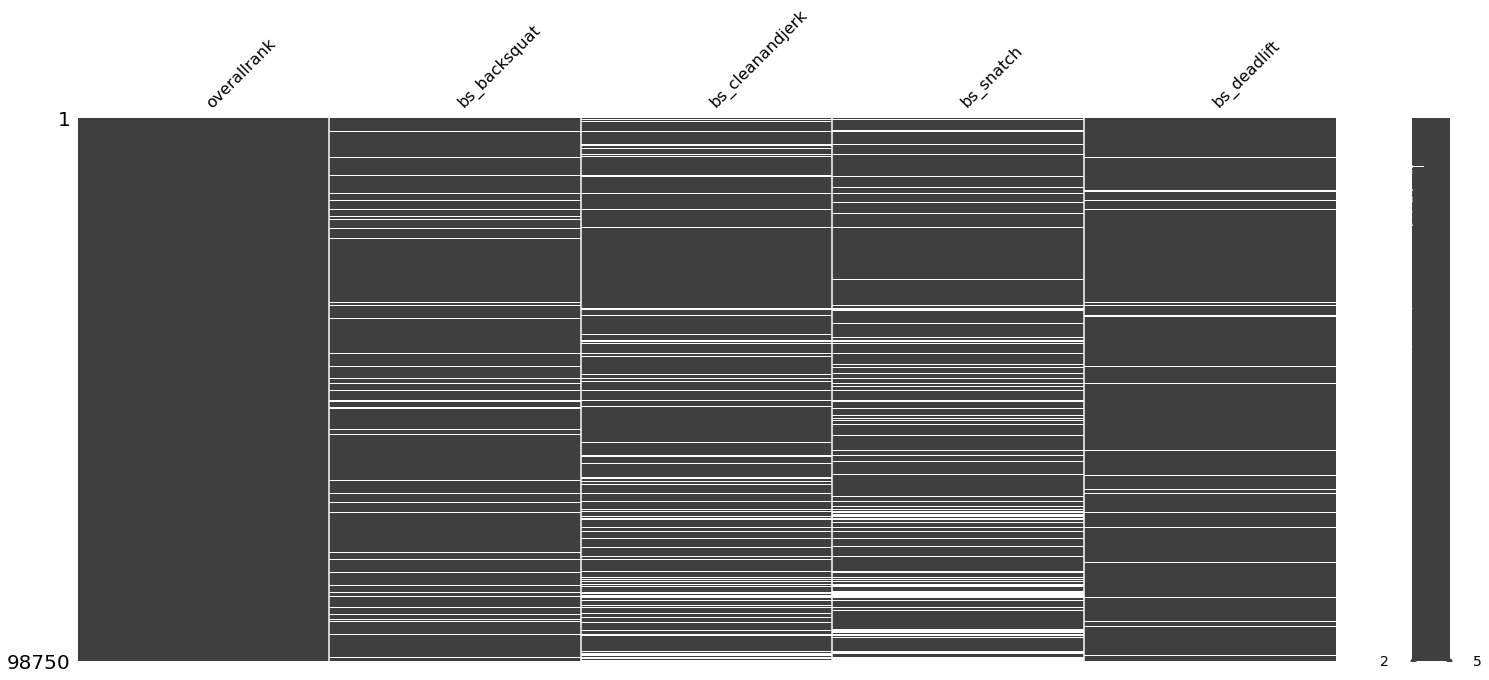

In [98]:
cols_lift = ['overallrank','bs_backsquat','bs_cleanandjerk','bs_snatch','bs_deadlift']
msno.matrix(df_lift[cols_lift].sort_values(by='overallrank'));

In [97]:
df_lift.shape

(98750, 72)

The very most part of benchmark statistics is missing. Amongst these features the olympic lifts are most commonly present. Considering observations with minimum one lift entry, there is still 30% of all competitors left. Since the workout results and the ranking position are influenced by missing of benchmark data, the missing structure is MNAR.
Recommendations:
* drop benchmark features besides lifts
* lifting features:
  - complete case analysis (drop missing observations)
  - multiple imputation of missing lifts